In [1]:
import pylab as pl
import numpy as np
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
#Task 1
mta = np.load("MTA_Fare.npy")
mta.shape

(600, 23, 194)

In [11]:
mta = mta.astype(float)
mta[mta == -1] = NaN
datarange = pd.date_range(start = '2010-05-21', periods = 194, freq = 'W')
datarange.shape

(194,)

In [61]:
mta_allsum = np.nansum(mta, axis=0)
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
print (mta_allsum.shape)

(23, 194)


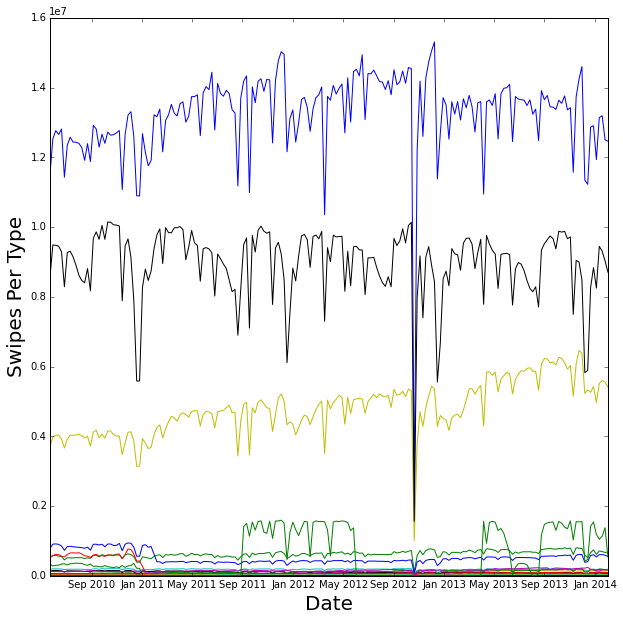

In [54]:
plt.figure(figsize=(10,10), dpi = 200)
ax = pl.plot(datarange, np.transpose(mta_allsum)) 
pl.ylabel('Swipes Per Type', fontsize = 20)
pl.xlabel('Date', fontsize = 20)

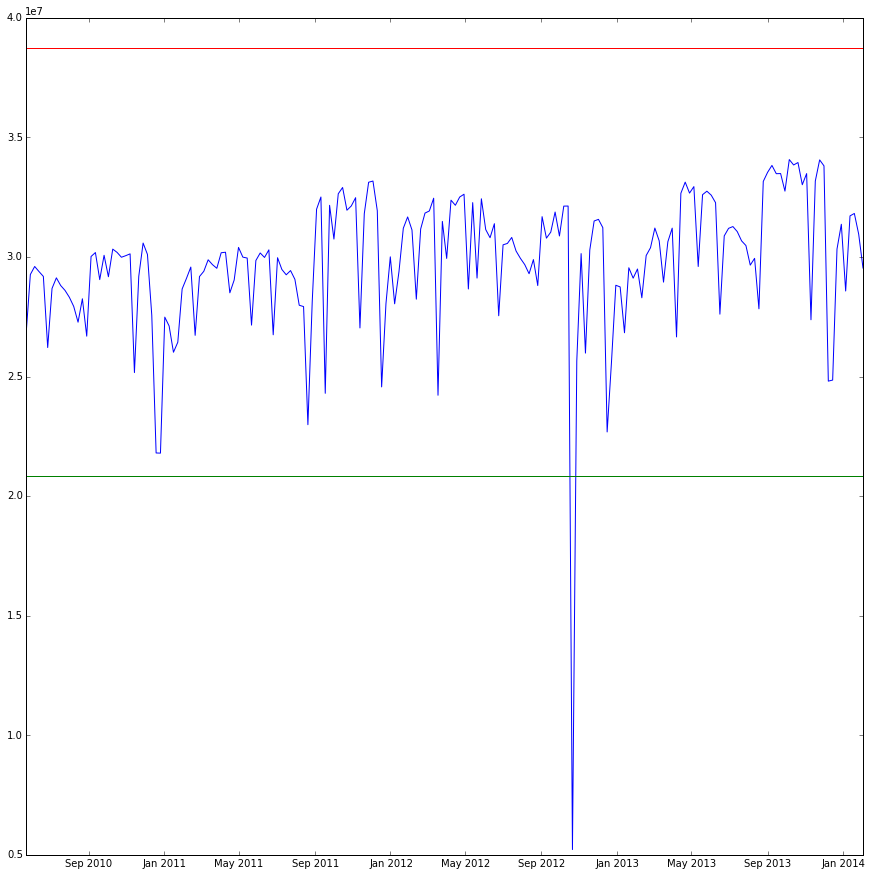

In [55]:
mtaall = np.nansum(mta_allsum, axis=0)
meanall = np.nanmean(mtaall)
stdall = np.nanstd(mtaall)
allthresholds = (meanall - stdall*3, meanall + stdall*3)

fig = pl.figure(figsize=(15, 15))
pl.plot(datarange, mtaall)
pl.plot([datarange.min(), datarange.max()], [
        allthresholds[0], allthresholds[0]])
pl.plot([datarange.min(), datarange.max()], [
        allthresholds[1], allthresholds[1]])

An event took place around the end of 2012, which decreased ridership. My guess is that Sandy hit NYC at the time, and this caused people prefer to staying at home rather than go out biking. 

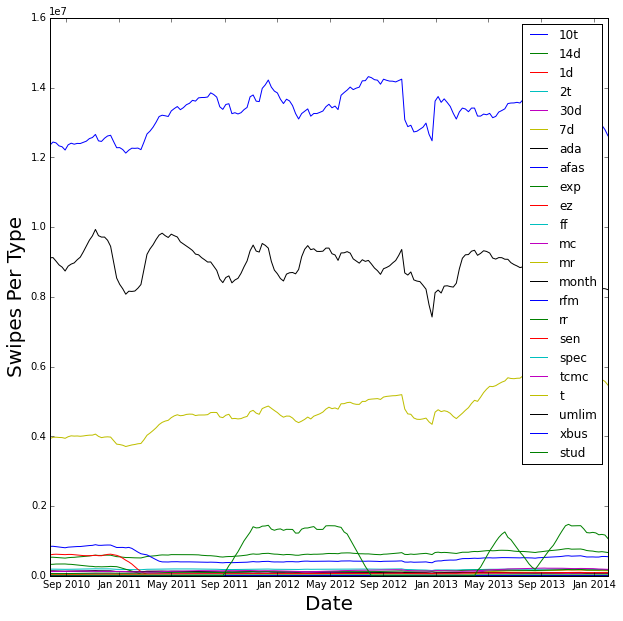

In [63]:
#Task 2
mtarollingmean = pd.rolling_mean(np.transpose(mta_allsum), 10)
plt.figure(figsize=(10,10), dpi = 200)
ax = pl.plot(datarange, mtarollingmean) 
pl.ylabel('Swipes Per Type', fontsize = 20)
pl.xlabel('Date', fontsize = 20)
pl.legend(ridetype)

In [72]:
first = mtarollingmean[10,:]
last = mtarollingmean[193,:]
ratio = first/last

print first, last, ratio

[  1.24380218e+07   5.32186000e+05   5.00146000e+04   1.90856400e+05
   4.87414000e+04   3.97092600e+06   9.12448180e+06   1.10576000e+04
   3.29921700e+05   6.14143400e+05   4.17903000e+04   1.32944000e+05
   5.60000000e+00   1.38431200e+05   8.46704100e+05   6.48262000e+04
   3.15259000e+04   1.74090000e+03   1.20940900e+05   2.11768000e+04
   6.75610000e+03   4.89800000e+02   0.00000000e+00] [  1.26164722e+07   6.67821700e+05   5.54549000e+04   1.78008600e+05
   4.95765000e+04   5.46768900e+06   8.20436750e+06   2.30000000e+00
   3.50000000e+00   9.00000000e-01   3.37796000e+04   1.60053500e+05
   1.43752600e+05   7.94565000e+04   5.48287900e+05   1.67287400e+05
   9.07982000e+04   3.18628000e+04   1.85191200e+05   2.15873000e+04
   5.36110000e+03   7.91600000e+02   1.06853960e+06] [  9.85855761e-01   7.96898334e-01   9.01896857e-01   1.07217516e+00
   9.83155326e-01   7.26253084e-01   1.11214933e+00   4.80765217e+03
   9.42633429e+04   6.82381556e+05   1.23714609e+00   8.30622261e-

Based on the ratio, the 8th, 9th and 10th type, which stand for afas, exp, ez, have a trend of decreasing usage. The 13th, 18th type, which stand for mr and spec, have a trend of increasing usage. It may be an inappropriate way to measure trend using the first and the last 10 because they are edge points. 

In [73]:
#Task 3
mta_stationsum = np.nansum(mta, axis=1)
print (mta_stationsum.shape)

(600, 194)


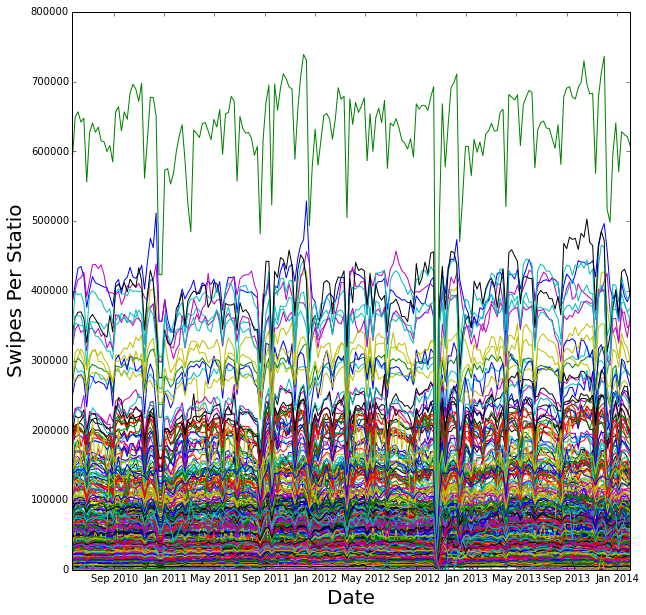

In [74]:
plt.figure(figsize=(10,10), dpi = 200)
ax = pl.plot(datarange, np.transpose(mta_stationsum)) 
pl.ylabel('Swipes Per Statio ', fontsize = 20)
pl.xlabel('Date', fontsize = 20)

In [75]:
f = np.abs(np.fft.rfft(mta_stationsum))
f.shape

(600, 98)

In [76]:
fre = np.fft.rfftfreq(194, d=1.0)
fre.shape

(98,)

In [77]:
print fre

[ 0.          0.00515464  0.01030928  0.01546392  0.02061856  0.0257732
  0.03092784  0.03608247  0.04123711  0.04639175  0.05154639  0.05670103
  0.06185567  0.06701031  0.07216495  0.07731959  0.08247423  0.08762887
  0.09278351  0.09793814  0.10309278  0.10824742  0.11340206  0.1185567
  0.12371134  0.12886598  0.13402062  0.13917526  0.1443299   0.14948454
  0.15463918  0.15979381  0.16494845  0.17010309  0.17525773  0.18041237
  0.18556701  0.19072165  0.19587629  0.20103093  0.20618557  0.21134021
  0.21649485  0.22164948  0.22680412  0.23195876  0.2371134   0.24226804
  0.24742268  0.25257732  0.25773196  0.2628866   0.26804124  0.27319588
  0.27835052  0.28350515  0.28865979  0.29381443  0.29896907  0.30412371
  0.30927835  0.31443299  0.31958763  0.32474227  0.32989691  0.33505155
  0.34020619  0.34536082  0.35051546  0.3556701   0.36082474  0.36597938
  0.37113402  0.37628866  0.3814433   0.38659794  0.39175258  0.39690722
  0.40206186  0.40721649  0.41237113  0.41752577  0.4

In [80]:
idxfre = np.where(min(abs(fre - 1.0/52)) == abs(fre - 1.0/52))[0][0]
print(idxfre)

4


In [82]:
station = np.argpartition(f[:,idxfre], -4)[-4:]
print station

[327 150 194   0]


station number 0,150,194,327 show the most prominent periodic trend on an annual period